In [1009]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [1011]:
df = pd.read_csv("airbnb data.csv")
df

C:\Users\KIIT\AppData\Local\Temp\ipykernel_4108\1292283203.py:1: DtypeWarning: Columns (25) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("airbnb data.csv")


,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,$193,10.0,9.0,10/19/2021,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,$28,30.0,45.0,5/21/2022,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,$124,3.0,0.0,NaN,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,$74,30.0,270.0,7/5/2019,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,$41,10.0,9.0,11/19/2018,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102594,6092437,Spare room in Williamsburg,12312296767,verified,Krik,Brooklyn,Williamsburg,40.70862,-73.94651,United States,...,$169,1.0,0.0,NaN,NaN,3.0,1.0,227.0,No Smoking No Parties or Events of any kind Pl...,NaN
102595,6092990,Best Location near Columbia U,77864383453,unconfirmed,Mifan,Manhattan,Morningside Heights,40.80460,-73.96545,United States,...,$167,1.0,1.0,7/6/2015,0.02,2.0,2.0,395.0,House rules: Guests agree to the following ter...,NaN
102596,6093542,"Comfy, bright room in Brooklyn",69050334417,unconfirmed,Megan,Brooklyn,Park Slope,40.67505,-73.98045,United States,...,$198,3.0,0.0,NaN,NaN,5.0,1.0,342.0,NaN,NaN
102597,6094094,Big Studio-One Stop from Midtown,11160591270,unconfirmed,Christopher,Queens,Long Island City,40.74989,-73.93777,United States,...,$109,2.0,5.0,10/11/2015,0.10,3.0,1.0,386.0,NaN,NaN


# Data Cleaning

In [1014]:
print('Initailly number of duplicates in the data:',df.duplicated().sum())

Initailly number of duplicates in the data: 541


In [1016]:
df.drop_duplicates(inplace = True)

In [1018]:
print("After removing number of duplicates",df.duplicated().sum())

After removing number of duplicates 0


In [1020]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 102058 entries, 0 to 102057
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              102058 non-null  int64  
 1   NAME                            101808 non-null  object 
 2   host id                         102058 non-null  int64  
 3   host_identity_verified          101769 non-null  object 
 4   host name                       101654 non-null  object 
 5   neighbourhood group             102029 non-null  object 
 6   neighbourhood                   102042 non-null  object 
 7   lat                             102050 non-null  float64
 8   long                            102050 non-null  float64
 9   country                         101526 non-null  object 
 10  country code                    101927 non-null  object 
 11  instant_bookable                101953 non-null  object 
 12  cancellation_policy  

In [1022]:
# last review is actually date in our data but in info here it is object that means string value 

In [1024]:
df['last review'] = pd.to_datetime(df['last review'], errors='coerce')

In [1026]:
#If the column has invalid dates, use errors='coerce' to replace them with NaT (Not a Time).

In [1028]:
#constructure year is in float -----> datetime

In [1030]:
#df['Construction year'] =  pd.to_datetime(df['Construction year'])
#df['Construction year'] = df['Construction year'].dt.year

In [1032]:
# type of price (object) ----> to (float) 

In [1034]:
# df['price'].astype(int) this shows error because this also contains some non numeric character to fistly we have to clean that

In [1036]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 102058 entries, 0 to 102057
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   id                              102058 non-null  int64         
 1   NAME                            101808 non-null  object        
 2   host id                         102058 non-null  int64         
 3   host_identity_verified          101769 non-null  object        
 4   host name                       101654 non-null  object        
 5   neighbourhood group             102029 non-null  object        
 6   neighbourhood                   102042 non-null  object        
 7   lat                             102050 non-null  float64       
 8   long                            102050 non-null  float64       
 9   country                         101526 non-null  object        
 10  country code                    101927 non-null  object      

In [1038]:
print("Total number of null values each column have:\n",df.isna().sum())

Total number of null values each column have:
 id                                     0
NAME                                 250
host id                                0
host_identity_verified               289
host name                            404
neighbourhood group                   29
neighbourhood                         16
lat                                    8
long                                   8
country                              532
country code                         131
instant_bookable                     105
cancellation_policy                   76
room type                              0
Construction year                    214
price                                247
service fee                          273
minimum nights                       400
number of reviews                    183
last review                        15832
reviews per month                  15818
review rate number                   319
calculated host listings count       319
availabili

In [1040]:
# licencse and house rule are not in our feature selction we can neglect it , means most of the houses does not have strict rules or if they have they
#can directly talk to the coustomer about the rules otherwise .
#licence is also not as much important as it can be cocluded from the dataset as out of 1lakh almost 1 lakh is null 
# so both of the features are not important as much so i neglected these features:--

In [1042]:
df.drop(columns =['house_rules','license'], inplace = True)

In [1044]:
# also in 1lakh dataset the null values of 100 to 1000 can not affect that much it means it can be ignored

In [1046]:
#Name column have name of the house or by which owner wants to rent the house and HosT name is the name of the owner 

In [1048]:
df.dropna(subset = ['NAME', 'host name'], inplace = True)

In [1050]:
#now the most important feature is the review feature in which we cant use deopna cuz it can create some error in the dataset as the nan value is more
#than 10k,so we need to fill this value stastiscally or use the previous value or next value 


In [1052]:
df.fillna({'review per month':df['reviews per month'].mean()} , inplace = True)

In [1054]:
#last review consist of the ddate at which review was done , but more than 10K columne have NaT so for our analysis we can use the last min 
#date instead of NaT

In [1056]:
df.fillna({'last review' : df['last review'].min()}, inplace = True)

In [1058]:
# here we can see that construction year is having 200 nan , 
# i have decide to replace the nan value with mode of construction year , logically it can be fitted there as hypothetically we can fill the value by 
# the year which has maximum construction of house 

In [1060]:
df.fillna({'Construction year': df['Construction year'].mode()[0]}, inplace = True)

In [1062]:
#mode can be multiple thats why only .mode() will return the series i have choosed the first one

In [1064]:
#removing dollar sign and converting it into floating point of price feature 

In [1066]:
df['price'] = df['price'].astype(str).replace(r'[$,]', '', regex=True).astype(float)
df['service fee'] = df['service fee'].astype(str).replace(r'[$,]', '', regex=True).astype(float)

In [1068]:
#now fillig the NAN values of price and service fee with the mean

In [1070]:
df.fillna({'price' : df['price'].mean()},inplace= True)

In [1072]:
df.fillna({'service fee' : df['service fee'].mean()},inplace= True)

In [1074]:
#after cleaning 

In [1076]:
print('After dropping unuseful columns and NaN \n',df.isnull().sum())

After dropping unuseful columns and NaN 
 id                                    0
NAME                                  0
host id                               0
host_identity_verified              276
host name                             0
neighbourhood group                  26
neighbourhood                        16
lat                                   8
long                                  8
country                             526
country code                        122
instant_bookable                     96
cancellation_policy                  70
room type                             0
Construction year                     0
price                                 0
service fee                           0
minimum nights                      394
number of reviews                   182
last review                           0
reviews per month                 15703
review rate number                  307
calculated host listings count      318
availability 365                    42

In [1078]:
df.head()

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,Construction year,price,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,2020.0,966.0,193.0,10.0,9.0,2021-10-19,0.21,4.0,6.0,286.0
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,2007.0,142.0,28.0,30.0,45.0,2022-05-21,0.38,4.0,2.0,228.0
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,2005.0,620.0,124.0,3.0,0.0,2012-07-11,NaN,5.0,1.0,352.0
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,2009.0,204.0,41.0,10.0,9.0,2018-11-19,0.10,3.0,1.0,289.0
5,1004098,Large Cozy 1 BR Apartment In Midtown East,45498551794,verified,Michelle,Manhattan,Murray Hill,40.74767,-73.97500,United States,...,2013.0,577.0,115.0,3.0,74.0,2019-06-22,0.59,3.0,1.0,374.0


In [1080]:
# now data cleanig , validation is done next is data visulisation 

# Top 10 Neighbourhood by Average price 

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'New Dorp'),
  Text(1, 0, 'Chelsea, Staten Island'),
  Text(2, 0, 'Fort Wadsworth'),
  Text(3, 0, 'Little Neck'),
  Text(4, 0, 'Jamaica Hills'),
  Text(5, 0, 'Shore Acres'),
  Text(6, 0, 'Arden Heights'),
  Text(7, 0, 'Midland Beach'),
  Text(8, 0, 'Mill Basin'),
  Text(9, 0, 'Riverdale')])

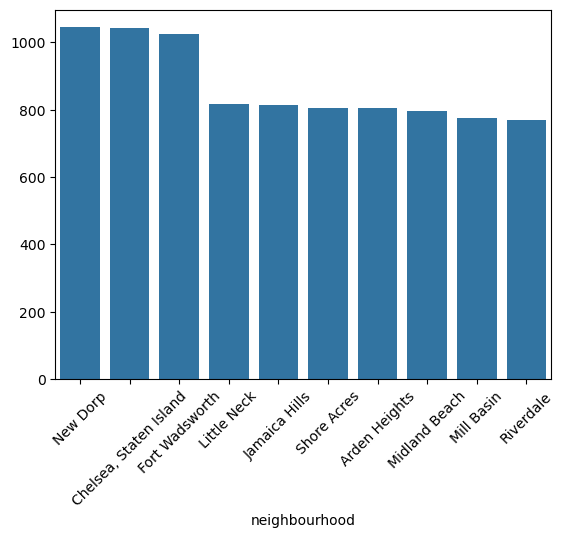

In [1083]:
avg_price=df.groupby('neighbourhood')['price'].mean().sort_values(ascending = False).head(10)
sns.barplot(x=avg_price.index, y =avg_price.values)
plt.xticks(rotation=45)

# Distribution of listing price 

In [1086]:
df['price'].describe()

count    101410.000000
mean        625.381008
std         331.218114
min          50.000000
25%         341.000000
50%         625.381008
75%         912.000000
max        1200.000000
Name: price, dtype: float64

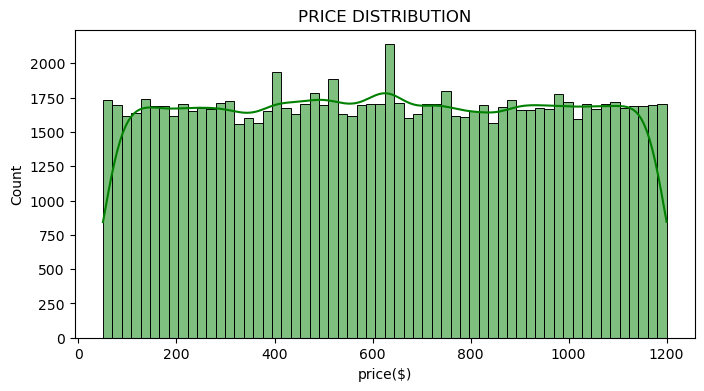

In [1088]:
plt.figure(figsize=(8,4))
sns.histplot(df['price'] , bins = 60 , kde = True, color = 'green')
plt.xlabel('price($)')
plt.title('PRICE DISTRIBUTION')
plt.show()

In [1089]:
#------>> this confirming that the price of the houses have wide range

# Distribution of Room Type 

In [1093]:
print('Types of Room AIRBNB have\n',df['room type'])

Types of Room AIRBNB have
 0            Private room
1         Entire home/apt
2            Private room
4         Entire home/apt
5         Entire home/apt
               ...       
102053       Private room
102054       Private room
102055    Entire home/apt
102056       Private room
102057    Entire home/apt
Name: room type, Length: 101410, dtype: object


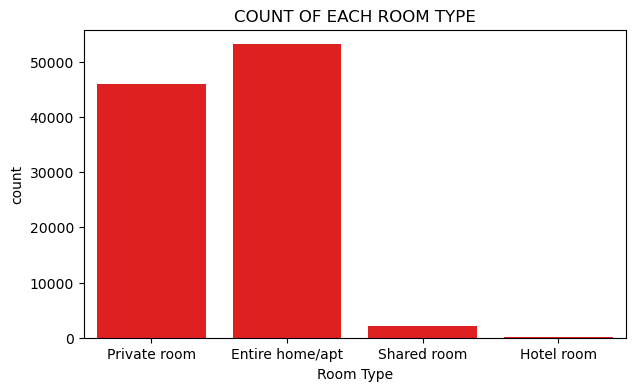

In [1095]:
plt.figure(figsize=(7,4))
sns.countplot(x= df['room type'], color='red')
plt.title('COUNT OF EACH ROOM TYPE')
plt.xlabel('Room Type')
plt.show()

In [1096]:
#-----> this conclued the amount of room avalable as well as popularity of room types in AIRBNB APP

# Distribution of listing (houses) in Areas

In [1100]:
df['neighbourhood group']

0          Brooklyn
1         Manhattan
2         Manhattan
4         Manhattan
5         Manhattan
            ...    
102053     Brooklyn
102054     Brooklyn
102055     Brooklyn
102056    Manhattan
102057    Manhattan
Name: neighbourhood group, Length: 101410, dtype: object

In [1102]:
#df['neighbourhood group'].value_counts()
#Counts occurrences of each unique value in the column.Returns a Series with values sorted in descending order.
#order=Ensures that Seaborn plots the categories from most to least frequent.

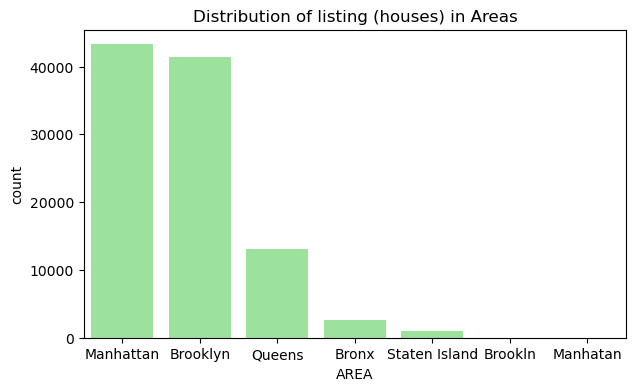

In [1104]:
plt.figure(figsize=(7,4))
df['neighbourhood group']=df['neighbourhood group'].str.title()
sns.countplot(x= df['neighbourhood group'], color='lightgreen', order= df['neighbourhood group'].value_counts().index)
plt.title('Distribution of listing (houses) in Areas')
plt.xlabel('AREA')
plt.show()

In [1105]:
#-----> this shows the most of the booking are happing in the manhattan and brooklyn area , means they are most frequent listing and popular area 
#prime locations whereas Bronx area and staten island have least

# Distribution of Price against differnt Room

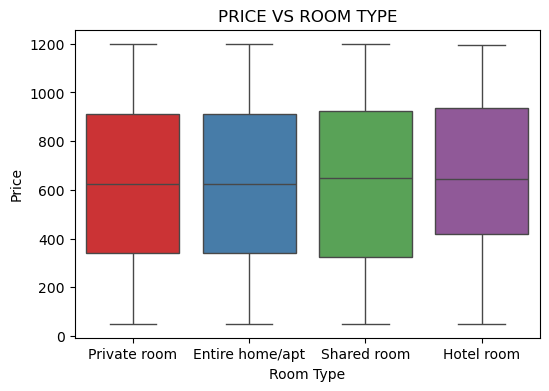

In [1109]:
plt.figure(figsize=(6,4))
sns.boxplot(x='room type', y='price', hue= 'room type', data= df, palette= 'Set1')
plt.title('PRICE VS ROOM TYPE')
plt.xlabel('Room Type')
plt.ylabel('Price')
plt.show()

# Review change over time

In [1112]:
# want to see change in review over month time frame
review_over_time= df.groupby(df['last review'].dt.to_period('M')).size()

Text(0.5, 1.0, 'Review Over time')

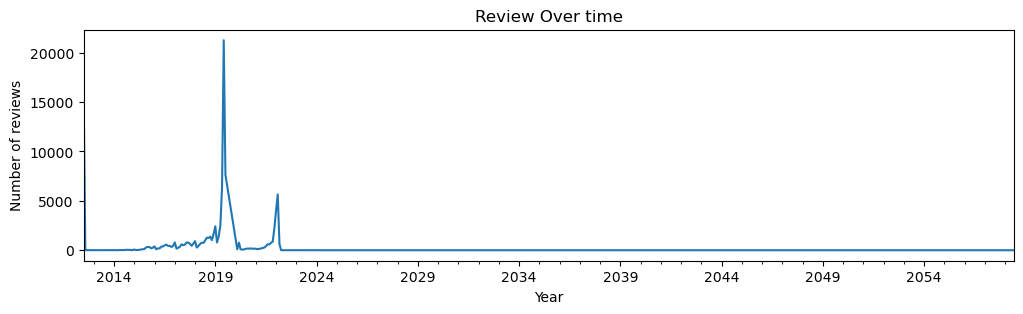

In [1114]:
plt.figure(figsize=(12,3))
review_over_time.plot(kind='line')
plt.xlabel('Year')
plt.ylabel('Number of reviews')
plt.title('Review Over time')

In [1115]:
#----> there was peak in the review in year 2019to2020

# correlation between Avalability , Price and  Review

Text(0.5, 1.0, 'Correlation Heatmap')

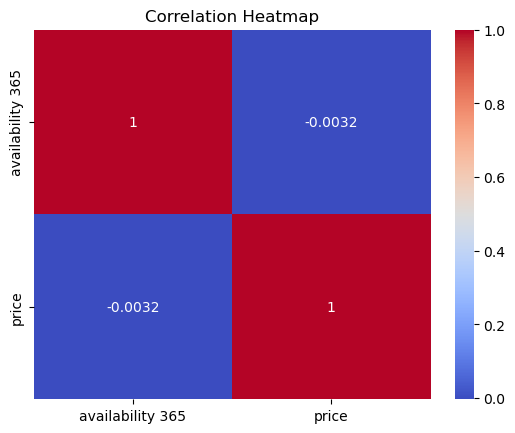

In [1119]:
sns.heatmap(df[['availability 365','price']].corr(), annot=True,cmap='coolwarm')
plt.title('Correlation Heatmap')

In [1120]:
#-----> here we can se that correlation between different fetures 
# postive correlation show postive relation that means directly propotional with features
# negative  correlation show neg relation that means inversely propotional with features
# it means when we compare availability 365 vs price they are neg correlated means when availabilty is high price gets lowered 

# Relationship between Minimum nights and Number of reviews

In [1124]:
df['minimum nights'].describe()

count    101016.000000
mean          8.113744
std          30.378014
min       -1223.000000
25%           2.000000
50%           3.000000
75%           5.000000
max        5645.000000
Name: minimum nights, dtype: float64

Text(0.5, 0, 'minimum night ')

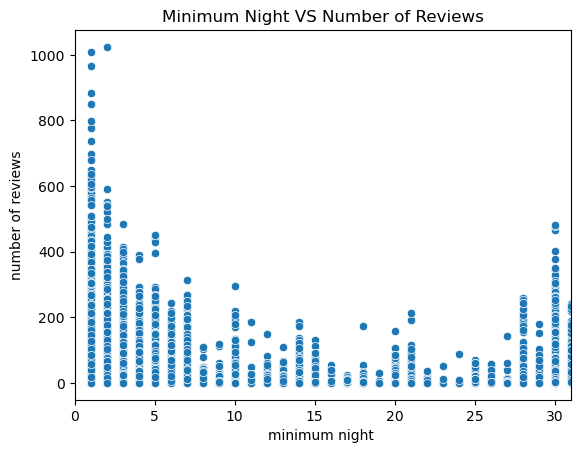

In [1126]:
sns.scatterplot(data =df, x='minimum nights', y= 'number of reviews')
plt.xlim(0,31) # since booking is done mostly 0_30 days max
plt.title('Minimum Night VS Number of Reviews')
plt.xlabel('minimum night ')

# Avg Price by min night stayed

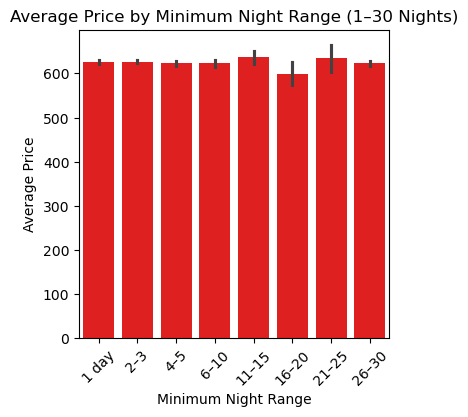

In [1128]:
df_short_stays = df[df['minimum nights'] <= 30].copy()#ccopy insure that it does not affect the original dataset
# Define custom bins within 0–30 range
bins = [0, 1, 3, 5, 10, 15, 20, 25, 30]
labels = ['1 day', '2–3', '4–5', '6–10', '11–15', '16–20', '21–25', '26–30']
df_short_stays['min_night_range'] = pd.cut(df_short_stays['minimum nights'], bins=bins, labels=labels)

# Plot
plt.figure(figsize=(4, 4))
sns.barplot(data=df_short_stays, x='min_night_range', y='price',color='red')
plt.title("Average Price by Minimum Night Range (1–30 Nights)")
plt.xlabel("Minimum Night Range")
plt.ylabel("Average Price")
plt.xticks(rotation=45)
plt.show()

# Customer satisfaction by Cancellation Policy vs Review Score

In [1131]:
df['cancellation_policy']

0           strict
1         moderate
2         flexible
4         moderate
5         flexible
            ...   
102053    moderate
102054    flexible
102055    moderate
102056      strict
102057    flexible
Name: cancellation_policy, Length: 101410, dtype: object

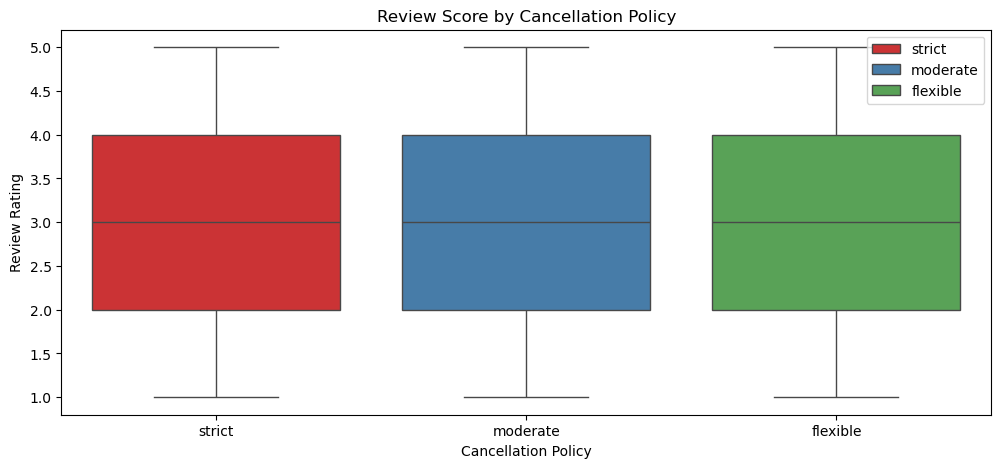

In [1132]:
plt.figure(figsize=(12, 5))
sns.boxplot(data=df, x='cancellation_policy', y='review rate number',hue='cancellation_policy',palette='Set1')
plt.title("Review Score by Cancellation Policy")
plt.xlabel("Cancellation Policy")
plt.ylabel("Review Rating")
plt.legend(loc='upper right')
plt.show()

In [1133]:
#----> this shows that the customer satisfactonn is not harmed in this as all the cancellation ploicy have avg 3 start rating

# Listing Count per Host

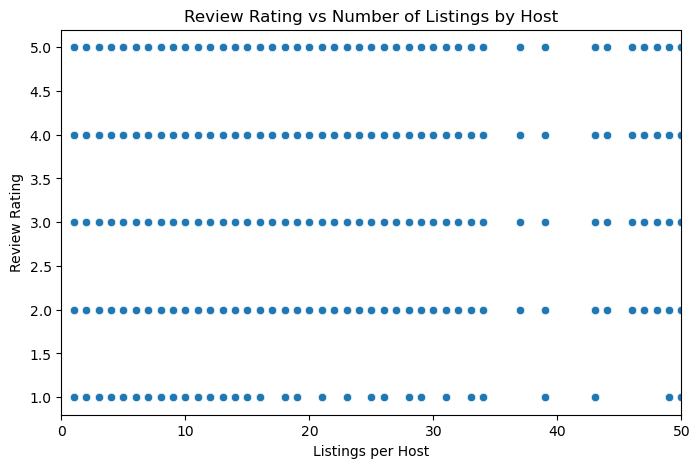

In [1137]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='calculated host listings count', y='review rate number')
plt.xlim(0,50)
plt.title("Review Rating vs Number of Listings by Host")
plt.xlabel("Listings per Host")
plt.ylabel("Review Rating")
plt.show()

In [1138]:
#---> this is showing the same person have more listing vs its review it means it is showing Relation between quantity vs quality
#if host with many listing maintain the quality or not 